In [157]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier
#dataaa = pd.read_csv("./District/NumberingDistrict.csv")
#dataaa

In [158]:
data = pd.read_csv("./District/NumberingDistrict.csv")
#data = pd.read_csv("./District/BeforeSeparateDistrict.csv")
#data = pd.read_csv("./allData.csv")
#data
#data = data.drop(columns = ['district'])
#data = data.drop(columns = ['total_ntd'])
data = data.drop(columns = ['number_of_land','total_ntd','transaction_month'])

data = data[data['unit_ntd'] > 0]
delete = data[((data.unit_ntd > 600000) | 
               (data.transaction_year < 2019) |
               (data.land_shift_area <= 0) |
               (data.num_partition <=0) |
               (data.number_of_building<=0)
              )].index
data = data.drop(delete)
data

#delete num_partition = 0 data and number_of_building data

,district,land_shift_area,complete_year,building_shift_total_area,num_room,num_hall,num_toilet,num_partition,management_org,unit_ntd,carpark_shift_area,carpark_ntd,transaction_year,building_age,number_of_building,number_of_carpark
1,1,40.75,62.062500,109.36,4,0,4,1,0,108357.717630,0.00,0,2019,1956.937500,1,0
2,1,33.81,69.000000,109.42,3,2,2,1,0,91390.970572,0.00,0,2019,1950.000000,1,0
3,1,32.19,84.000000,163.53,3,2,2,1,1,128416.804256,0.00,0,2019,1935.000000,1,1
4,1,60.25,108.000000,204.79,3,2,3,1,1,328157.624884,0.00,0,2019,1911.000000,1,0
5,10,10.65,107.000000,88.70,2,1,1,1,1,205749.718151,0.00,0,2019,1912.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,11,13.10,67.000000,46.22,3,1,1,1,0,118996.105582,0.00,0,2020,1953.000000,1,0
5906,1,24.75,89.000000,122.18,3,2,2,1,1,196431.494516,7.42,1700000,2019,1930.000000,1,1
5907,1,29.04,73.114286,116.50,5,3,3,1,0,115450.643777,0.00,0,2019,1945.885714,1,0
5908,10,41.71,87.000000,155.03,3,2,2,1,1,243307.746888,0.00,0,2019,1932.000000,1,1


In [159]:
#INTERVAL = 1000
#data['unit_ntd'] = (data['unit_ntd'] // INTERVAL) * INTERVAL
"""
data['land_shift_area']=(data['land_shift_area']-data['land_shift_area'].min())/(data['land_shift_area'].max()-data['land_shift_area'].min())
data['complete_year']=(data['complete_year']-data['complete_year'].min())/(data['complete_year'].max()-data['land_shift_area'].min())
data['building_shift_total_area']=(data['building_shift_total_area']-data['building_shift_total_area'].min())/(data['building_shift_total_area'].max()-data['building_shift_total_area'].min())
ss='num_room'
data[ss]=(data[ss]-data[ss].min())/(data[ss].max()-data[ss].min())
ss='num_hall'
data[ss]=(data[ss]-data[ss].min())/(data[ss].max()-data[ss].min())
ss='num_toilet'
data[ss]=(data[ss]-data[ss].min())/(data[ss].max()-data[ss].min())
ss='carpark_shift_area'
data[ss]=(data[ss]-data[ss].min())/(data[ss].max()-data[ss].min())
ss='transaction_year'
data[ss]=(data[ss]-data[ss].min())/(data[ss].max()-data[ss].min())
ss='transaction_month'
data[ss]=(data[ss]-data[ss].min())/(data[ss].max()-data[ss].min())
ss='building_age'
data[ss]=(data[ss]-data[ss].min())/(data[ss].max()-data[ss].min())
"""

data

,district,land_shift_area,complete_year,building_shift_total_area,num_room,num_hall,num_toilet,num_partition,management_org,unit_ntd,carpark_shift_area,carpark_ntd,transaction_year,building_age,number_of_building,number_of_carpark
1,1,40.75,62.062500,109.36,4,0,4,1,0,108357.717630,0.00,0,2019,1956.937500,1,0
2,1,33.81,69.000000,109.42,3,2,2,1,0,91390.970572,0.00,0,2019,1950.000000,1,0
3,1,32.19,84.000000,163.53,3,2,2,1,1,128416.804256,0.00,0,2019,1935.000000,1,1
4,1,60.25,108.000000,204.79,3,2,3,1,1,328157.624884,0.00,0,2019,1911.000000,1,0
5,10,10.65,107.000000,88.70,2,1,1,1,1,205749.718151,0.00,0,2019,1912.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,11,13.10,67.000000,46.22,3,1,1,1,0,118996.105582,0.00,0,2020,1953.000000,1,0
5906,1,24.75,89.000000,122.18,3,2,2,1,1,196431.494516,7.42,1700000,2019,1930.000000,1,1
5907,1,29.04,73.114286,116.50,5,3,3,1,0,115450.643777,0.00,0,2019,1945.885714,1,0
5908,10,41.71,87.000000,155.03,3,2,2,1,1,243307.746888,0.00,0,2019,1932.000000,1,1


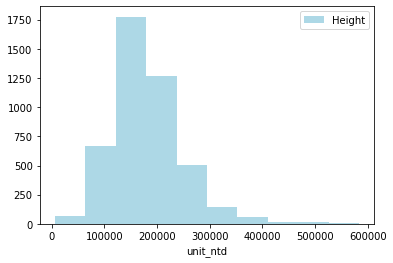

In [160]:
plt.hist(data.unit_ntd, density=False, color = 'lightblue', cumulative = False, label = "Height")
plt.legend()
plt.xlabel('unit_ntd')
plt.show()

In [161]:
#Model
reg = LinearRegression()
#Data and target
X = data.drop(columns=['unit_ntd','number_of_building','num_partition']).values
#X=(X-X.min())/(X.max()-X.min())
y = data['unit_ntd'].values
#Cross validation
#Score = ((y_true - y_pred) ^ 2).sum()
#predicted = cross_validate(reg, X, y, cv = 10)
#predicted

In [162]:
predict_ntd = cross_val_predict(reg, X, y ,cv = 10)
display(abs(y - predict_ntd))
display(abs(y - predict_ntd).mean())
#predict_ntd

array([21060.82670601, 22081.65711368,  2468.65219278, ...,
       12091.38434387, 27426.17224071, 81778.27550268])

39155.765083555656

In [163]:
#Model
reg = DecisionTreeRegressor()
#Data and target
X = data.drop(columns=['unit_ntd','number_of_building','num_partition']).values
#X=(X-X.min())/(X.max()-X.min())
y = data['unit_ntd'].values
#Cross validation
#Score = ((y_true - y_pred) ^ 2).sum()
#predicted = cross_validate(reg, X, y, cv = 10)
#predicted

In [164]:
predict_ntd = cross_val_predict(reg, X, y ,cv = 10)
display(abs(y - predict_ntd))
display(abs(y - predict_ntd).mean())
#predict_ntd

array([ 29526.76795496,  22747.4683086 ,   2826.22952971, ...,
        33913.65695398, 129771.73074035, 179756.70701658])

42399.16935372322

In [165]:
#RandomForestRegressor
#reg = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=10, n_jobs=-1)
reg = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=10, n_jobs=-1,oob_score='true')
X = data.drop(columns=['unit_ntd','number_of_building','num_partition','transaction_year']).values
#X=(X-X.min())/(X.max()-X.min()),
y = data['unit_ntd'].values
#Cross validation
#Score = ((y_true - y_pred) ^ 2).sum()
#predicted = cross_validate(reg, X, y, cv = 10)
#predicted

In [166]:
predict_ntd = cross_val_predict(reg, X, y ,cv = 10)
display(abs(y - predict_ntd))
display(abs(y - predict_ntd).mean())
#predict_ntd

array([ 20201.97322907,  17601.6379076 ,   4004.26842752, ...,
        11188.67503502,  73863.77320682, 119050.01313857])

31471.224208719104

In [167]:
#Adaboost
#bdt = BaggingClassifier(max_samples=1.0,warm_start='true',n_estimators=10,base_estimator=reg)
bdt = AdaBoostRegressor(reg, n_estimators=200, random_state=0, learning_rate= 1, )
predict_ntd = cross_val_predict(bdt, X, y ,cv = 10)
display(abs(y - predict_ntd))
display(abs(y - predict_ntd).mean())

KeyboardInterrupt: 

In [ ]:
# Predict for real house
reg = DecisionTreeRegressor()
X = data.drop(columns=['unit_ntd']).values
y = data['unit_ntd'].values
reg.fit(X, y)


test = [[12, 321.7, 5.0, 163.0, 4, 2, 3, 1, 1, 24.8, 0, 2020, 12, 2015, 1, 2],
        [8, 13.88, 14, 12.16, 1, 1, 1, 1, 0, 0, 0,2020, 11, 2006, 1, 0]]
reg.predict(test)

In [ ]:
'''
from sklearn.svm import SVR
#Model
reg = SVR(kernel='rbf', C=1e3, gamma=0.1)
#Data and target
X = data.drop(columns=['unit_ntd']).values
y = data['unit_ntd'].values
#Cross validation
#Score = ((y_true - y_pred) ^ 2).sum()
predicted = cross_validate(reg, X, y, cv = 10)
'''

In [ ]:
'''
from sklearn.model_selection import cross_val_predict
predict_ntd = cross_val_predict(reg, X, y ,cv = 10)
display(abs(y - predict_ntd))
display(abs(y - predict_ntd).mean())

#predict_ntd
'''